___Context : 
It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.___

___Content : 
The dataset contains transactions made by credit cards in September 2013 by European cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. 
The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.
It contains only numerical input variables which are the result of a PCA transformation. 
Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, 
the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. 
The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.
Given the class imbalance ratio, we recommend measuring the accuracy using the Area Under the Precision-Recall Curve (AUPRC). Confusion matrix accuracy is not meaningful for unbalanced classification.___

In [1]:
# Importing Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,average_precision_score

In [2]:
# Loading the data

credit_data = pd.read_csv('D:\Projects\Credit Card Fraud Detection\creditcard.csv')

In [3]:
# Display first 5 rows

credit_data.head()  

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
# Display last 5 rows

credit_data.tail()  

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [5]:
# Get the number of Rows & Columns
credit_data.shape

(284807, 31)

In [6]:
# Dataset information
credit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [7]:
# Getting actual count of empty values for each column
credit_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [8]:
# Distribution of Legit & Fraudulent transactions
credit_data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

__We can see that the data is highly imbalanced where__
* __0  -->  Normal Transaction__
* __1  -->  Fraudulent Transaction__

In [9]:
# Separating the data for analysis:

legit = credit_data[credit_data.Class == 0]
fraud = credit_data[credit_data.Class == 1]

In [10]:
print("Legid :",legit.shape)
print("Fraud :",fraud.shape)

Legid : (284315, 31)
Fraud : (492, 31)


In [11]:
# Statistical measures of the data :

legit.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [12]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [13]:
# Comparing the values for both transactions

credit_data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


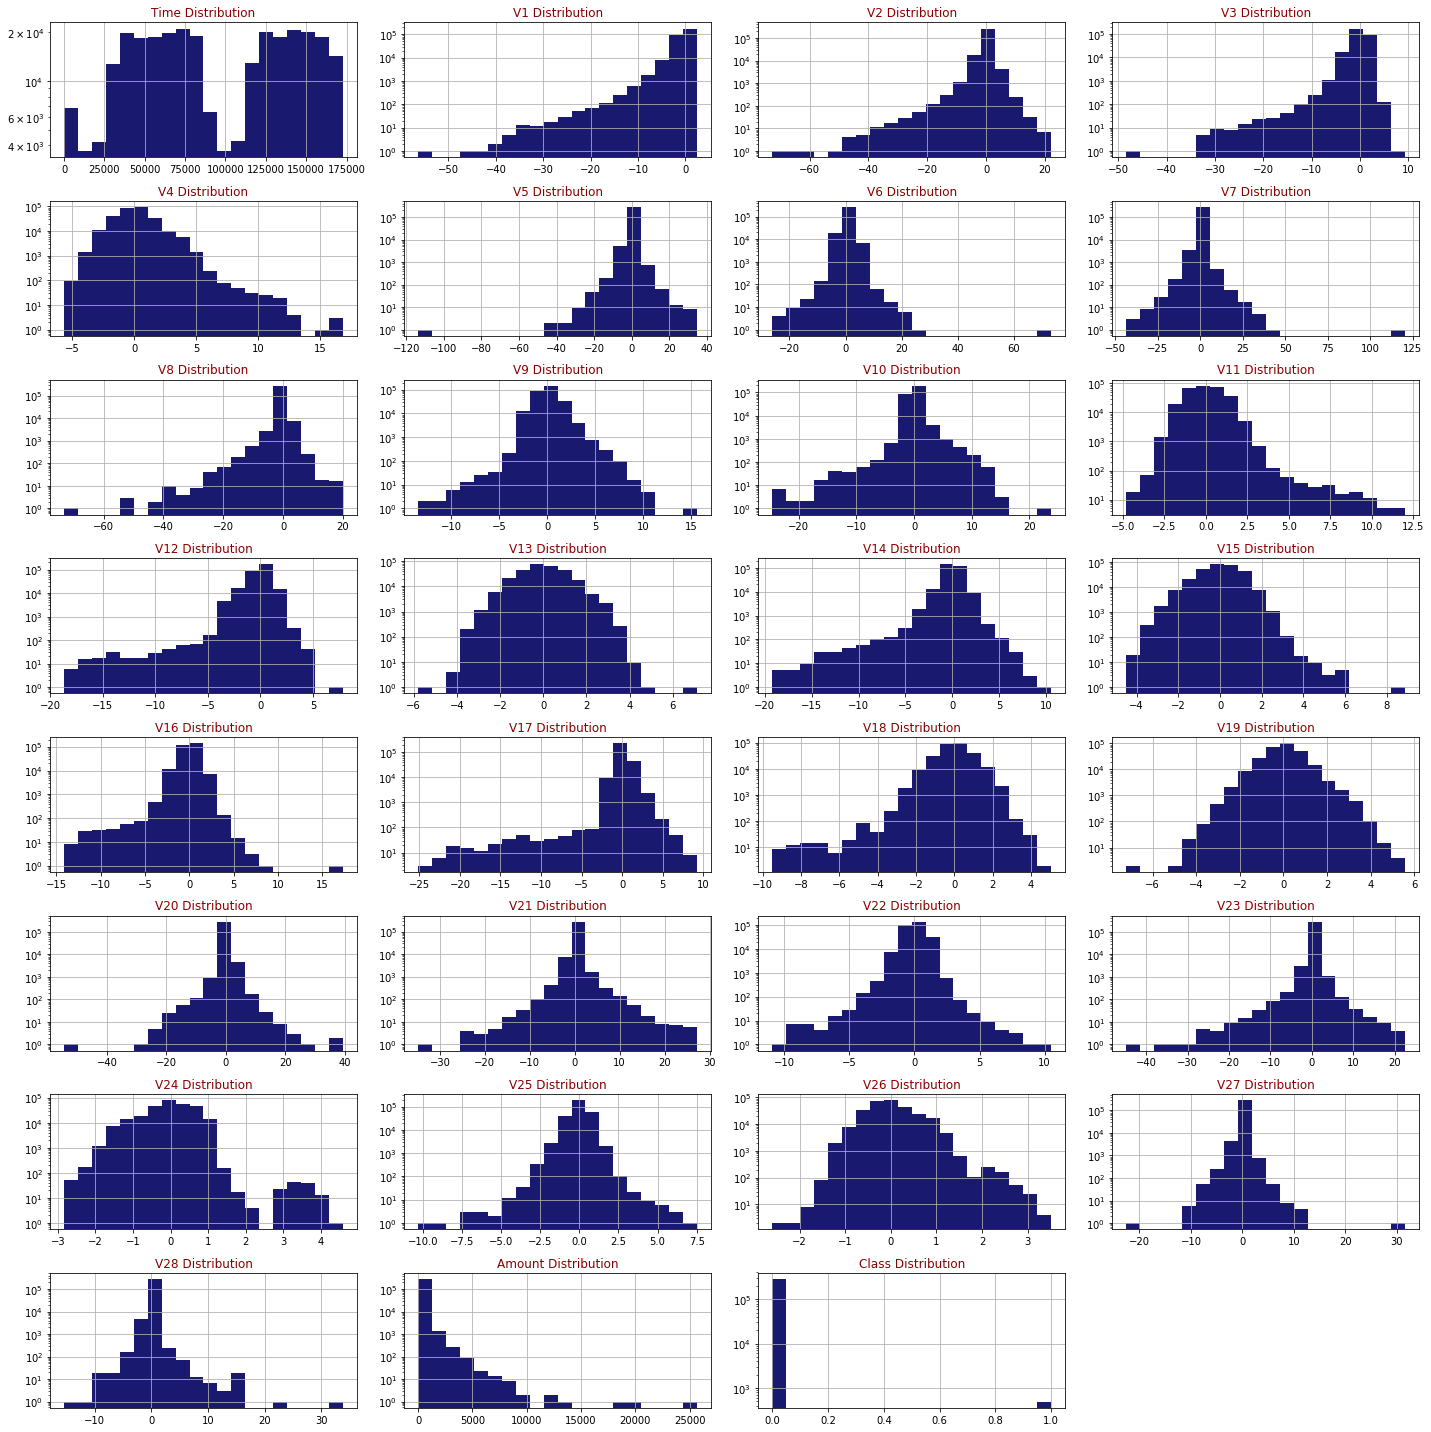

In [14]:
def draw_histograms(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=20,ax=ax,facecolor='midnightblue')
        ax.set_title(feature+" Distribution",color='DarkRed')
        ax.set_yscale('log')
    fig.tight_layout()  
    plt.show()

draw_histograms(credit_data,credit_data.columns,8,4)

## Under Sampling

__Since the data is highly imbalanced, we cant use it to train the model. To overcome this we use 'Under Sampling' where we build a sample dataset containing similar distribution of Normal transactions and Fraudulent Transactions__

__We can perform undersampling by taking random sample or by using NearMiss__

### __Step1: Random Sample__

In [15]:
# Number of Fraudulent Transactions --> 492

legit_sample = legit.sample(n=492)

In [16]:
# Concatenating two DataFrames

new_credit_data = pd.concat([legit_sample, fraud], axis=0)

In [17]:
new_credit_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
211004,138217.0,-1.092804,-0.140712,0.608619,-2.621535,0.095963,0.487388,-0.482433,0.700699,-1.178947,...,0.491765,1.098492,-0.283557,-0.300498,0.308604,-0.115833,0.211657,0.057599,60.00,0
134800,80969.0,-2.114894,2.503972,-0.631958,-0.022565,-1.165857,1.325387,-5.855893,-13.192287,-0.666391,...,-6.323811,1.998317,0.004499,0.376312,1.197176,-0.248629,-0.048306,0.344954,1.00,0
238058,149505.0,1.952430,-0.408528,-0.227226,0.073605,-0.740622,-0.463881,-0.612008,0.072533,1.078262,...,-0.135052,-0.260508,0.399360,-0.011146,-0.559756,-0.302685,0.009240,-0.047006,1.46,0
195117,130905.0,1.866326,-1.124835,-1.498936,-0.336184,-0.542619,-0.600556,-0.191010,-0.234143,-0.508403,...,0.062671,0.486509,-0.160418,-0.394346,0.179152,-0.029236,-0.020471,-0.042419,153.50,0
117269,74610.0,1.260799,-0.708373,-0.081775,-0.616115,-0.830831,-0.827630,-0.192035,-0.291158,-0.935835,...,-0.361782,-0.754734,-0.100602,-0.075935,0.312781,1.061141,-0.082778,0.016108,101.00,0


In [18]:
new_credit_data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1
281674,170348.0,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,0.577829,...,-0.164350,-0.295135,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309,42.53,1


In [19]:
new_credit_data['Class'].value_counts()

1    492
0    492
Name: Class, dtype: int64

In [20]:
new_credit_data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94355.758130,-0.051273,-0.043615,0.043518,-0.098495,-0.025962,-0.093351,0.073052,-0.029077,-0.001335,...,0.007061,-0.007264,0.041552,0.005110,0.053932,0.014730,0.002657,0.000123,0.025642,90.720671
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


__Splitting the data into Features & Targets__

In [21]:
# Splitting the data into Features & Targets

X = new_credit_data.drop(columns='Class', axis=1)
Y = new_credit_data['Class']

In [22]:
X.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
211004,138217.0,-1.092804,-0.140712,0.608619,-2.621535,0.095963,0.487388,-0.482433,0.700699,-1.178947,...,0.385637,0.491765,1.098492,-0.283557,-0.300498,0.308604,-0.115833,0.211657,0.057599,60.00
134800,80969.0,-2.114894,2.503972,-0.631958,-0.022565,-1.165857,1.325387,-5.855893,-13.192287,-0.666391,...,3.279257,-6.323811,1.998317,0.004499,0.376312,1.197176,-0.248629,-0.048306,0.344954,1.00
238058,149505.0,1.952430,-0.408528,-0.227226,0.073605,-0.740622,-0.463881,-0.612008,0.072533,1.078262,...,-0.227095,-0.135052,-0.260508,0.399360,-0.011146,-0.559756,-0.302685,0.009240,-0.047006,1.46
195117,130905.0,1.866326,-1.124835,-1.498936,-0.336184,-0.542619,-0.600556,-0.191010,-0.234143,-0.508403,...,-0.337890,0.062671,0.486509,-0.160418,-0.394346,0.179152,-0.029236,-0.020471,-0.042419,153.50
117269,74610.0,1.260799,-0.708373,-0.081775,-0.616115,-0.830831,-0.827630,-0.192035,-0.291158,-0.935835,...,-0.262363,-0.361782,-0.754734,-0.100602,-0.075935,0.312781,1.061141,-0.082778,0.016108,101.00


In [23]:
Y.head()

211004    0
134800    0
238058    0
195117    0
117269    0
Name: Class, dtype: int64

In [24]:
# Split the data into Training data & Testing Data

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [25]:
print(X.shape, X_train.shape, X_test.shape)

(984, 30) (787, 30) (197, 30)


# Logistic Regression

In [26]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train,Y_train)

LogisticRegression()

In [27]:
# Accuracy on training data

X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction,Y_train)
print('Accuracy score on Training data : ', training_data_accuracy)

Accuracy score on Training data :  0.9263024142312579


In [28]:
# Accuracy on test data

X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction,Y_test)
print('Accuracy score on Test Data : ', test_data_accuracy)

Accuracy score on Test Data :  0.8934010152284264


In [29]:
# Area Under the Precision-Recall Curve (AUPRC)

auprc = average_precision_score(X_test_prediction,Y_test)
print('Area Under the Precision-Recall Curve (AUPRC) score :', auprc)

Area Under the Precision-Recall Curve (AUPRC) score : 0.826741786132649


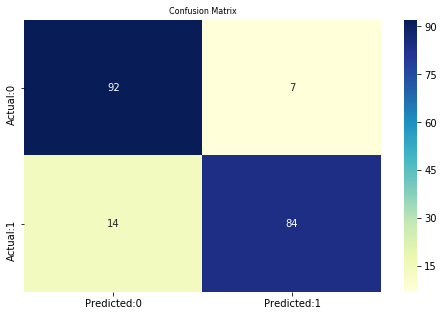

In [30]:
# Confusion Matrix

cm=confusion_matrix(Y_test,X_test_prediction)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu");
plt.title('Confusion Matrix', fontsize=8)
plt.show()

# AdaBoost

In [31]:
RANDOM_STATE = 2018
NUM_ESTIMATORS = 100
target = 'Class'
predictors = ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',\
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19',\
       'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28',\
       'Amount']

In [32]:
# pip install ada-boost
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier(random_state=RANDOM_STATE,
                         algorithm='SAMME.R',
                         learning_rate=1,
                             n_estimators=NUM_ESTIMATORS)

In [33]:
clf.fit(X_train,Y_train)

AdaBoostClassifier(learning_rate=1, n_estimators=100, random_state=2018)

In [34]:
# Accuracy on training data

X_train_prediction1=clf.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction1,Y_train)
print('Accuracy score on Training data : ', training_data_accuracy)

Accuracy score on Training data :  1.0


In [35]:
# Accuracy on test data

X_test_prediction1 = clf.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction1,Y_test)
print('Accuracy score on Test Data : ', test_data_accuracy)

Accuracy score on Test Data :  0.8984771573604061


In [36]:
# Area Under the Precision-Recall Curve (AUPRC)

auprc = average_precision_score(X_test_prediction1,Y_test)
print('Area Under the Precision-Recall Curve (AUPRC) score :', auprc)

Area Under the Precision-Recall Curve (AUPRC) score : 0.8570921168633205


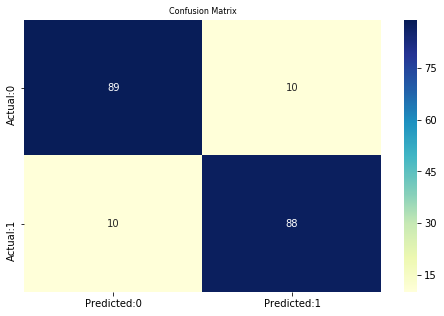

In [37]:
# Confusion Matrix

cm=confusion_matrix(Y_test,X_test_prediction1)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu");
plt.title('Confusion Matrix', fontsize=8)
plt.show()

In [38]:
print(classification_report(X_test_prediction1,Y_test))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90        99
           1       0.90      0.90      0.90        98

    accuracy                           0.90       197
   macro avg       0.90      0.90      0.90       197
weighted avg       0.90      0.90      0.90       197



### __Step2 :__
## Performing Under Sampling : NearMiss

__Near Miss refers to a collection of undersampling methods that select examples based on the distance of majority class examples to minority class examples.
NearMiss-1: Majority class examples with minimum average distance to three closest minority class examples.
NearMiss-2: Majority class examples with minimum average distance to three furthest minority class examples.
NearMiss-3: Majority class examples with minimum distance to each minority class example.__

In [39]:
from collections import Counter

credit_data = pd.read_csv('D:\Projects\Credit Card Fraud Detection\creditcard.csv')
X = credit_data.drop(columns='Class', axis=1)
Y = credit_data['Class']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

Counter(Y_train)

Counter({0: 227451, 1: 394})

In [40]:
from imblearn.under_sampling import NearMiss

ns=NearMiss(version=1, n_neighbors=3)
X_train_ns,Y_train_ns=ns.fit_resample(X_train,Y_train)

print("The number of classes before fit {}".format(Counter(Y_train)))
print("The number of classes after fit {}".format(Counter(Y_train_ns)))

The number of classes before fit Counter({0: 227451, 1: 394})
The number of classes after fit Counter({0: 394, 1: 394})


## Random Forest

In [41]:
from sklearn.ensemble import RandomForestClassifier

classifier=RandomForestClassifier()
classifier.fit(X_train_ns,Y_train_ns)

RandomForestClassifier()

In [42]:
# Accuracy on training data

X_train_prediction2=classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction2,Y_train)
print('Accuracy score on Training data : ', training_data_accuracy)

Accuracy score on Training data :  0.8296956264126928


In [43]:
# Accuracy on test data

X_test_prediction2 = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction2,Y_test)
print('Accuracy score on Test Data : ', test_data_accuracy)

Accuracy score on Test Data :  0.8296934798637688


In [44]:
# Area Under the Precision-Recall Curve (AUPRC)

auprc = average_precision_score(X_test_prediction2, Y_test)
print('Area Under the Precision-Recall Curve (AUPRC) score :', auprc)

Area Under the Precision-Recall Curve (AUPRC) score : 0.17923448468748848


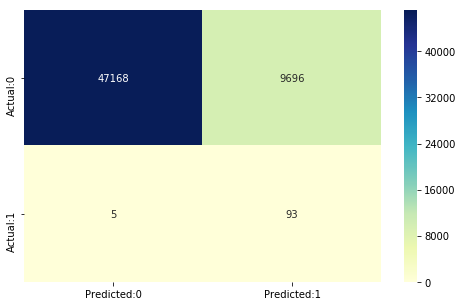

In [45]:
# confusion Matrix

cm=confusion_matrix(Y_test,X_test_prediction2)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [46]:
print(classification_report(Y_test,X_test_prediction2))

              precision    recall  f1-score   support

           0       1.00      0.83      0.91     56864
           1       0.01      0.95      0.02        98

    accuracy                           0.83     56962
   macro avg       0.50      0.89      0.46     56962
weighted avg       1.00      0.83      0.91     56962

